#Generative Adversarial Networks, or GANs,
 are a type of deep learning framework that can generate new data instances that are similar to the training data. They are composed of two competing models: a generator and a discriminator.

#Overview of GAN Structure

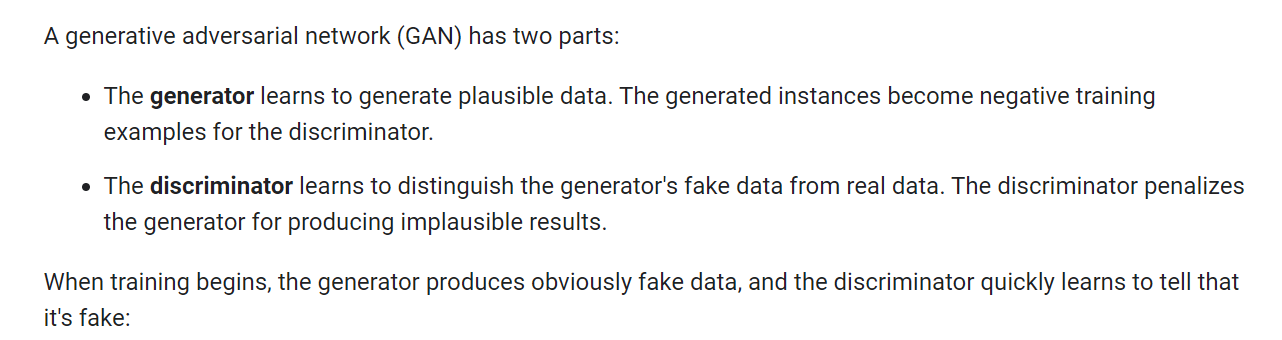

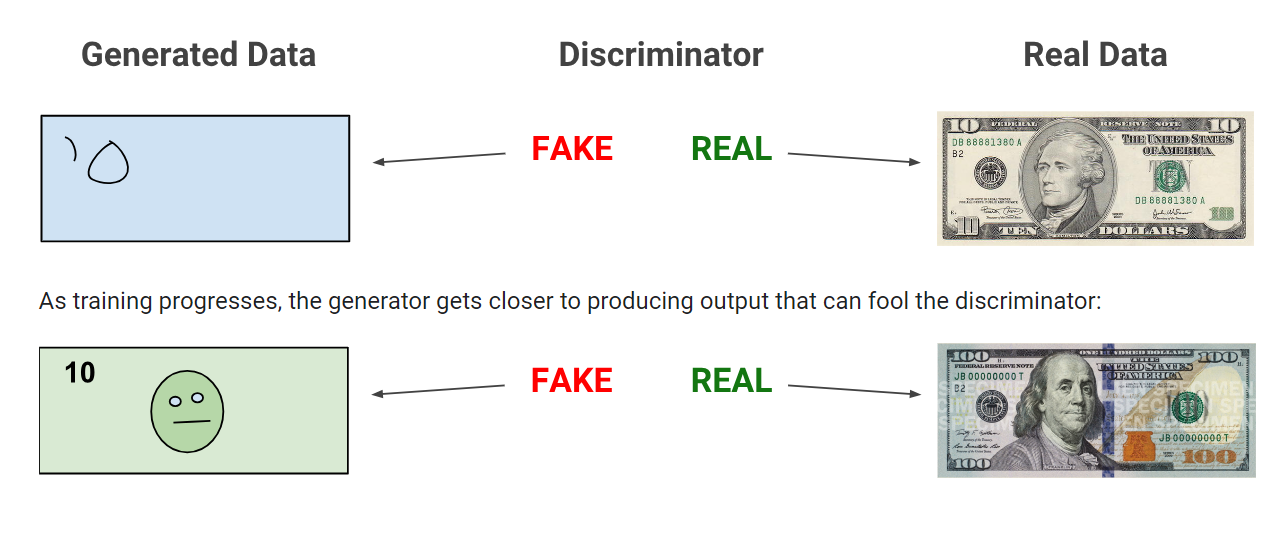

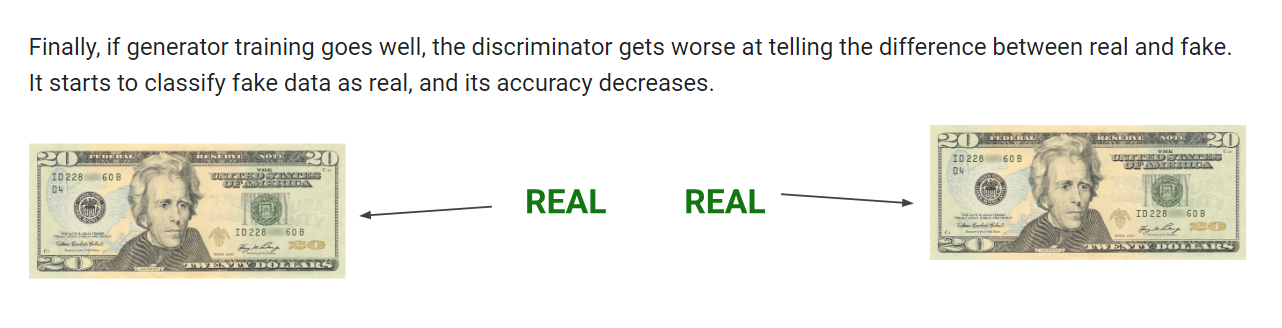

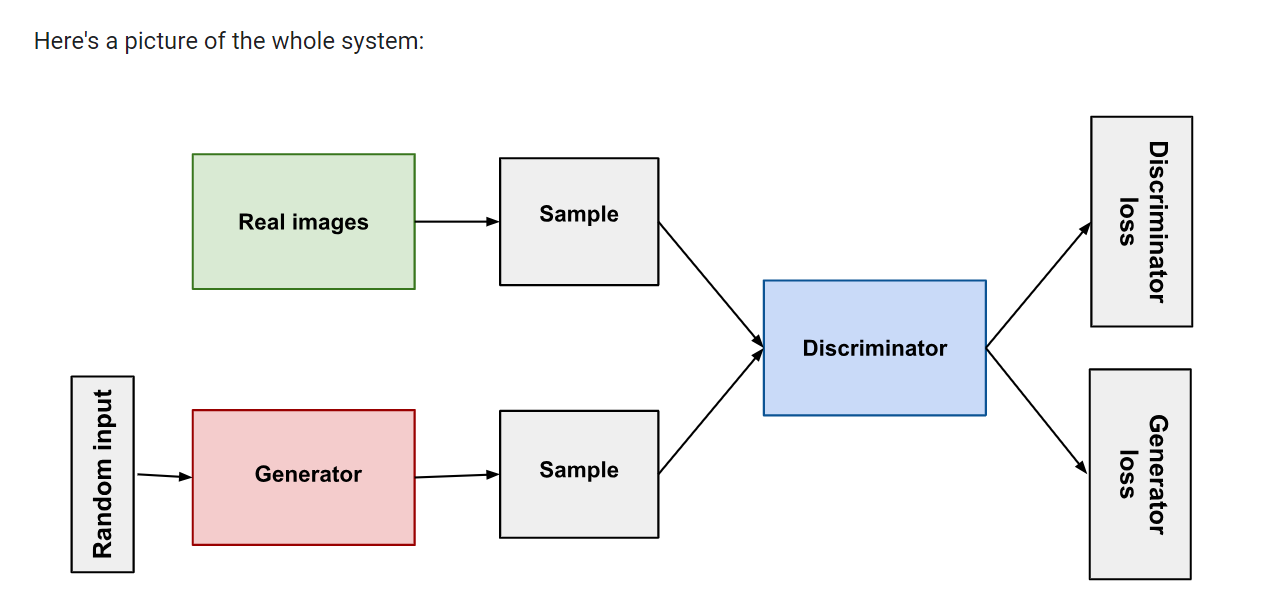

Both the generator and the discriminator are neural networks. The generator output is connected directly to the discriminator input. Through backpropagation, the discriminator's classification provides a signal that the generator uses to update its weights.

#The Discriminator

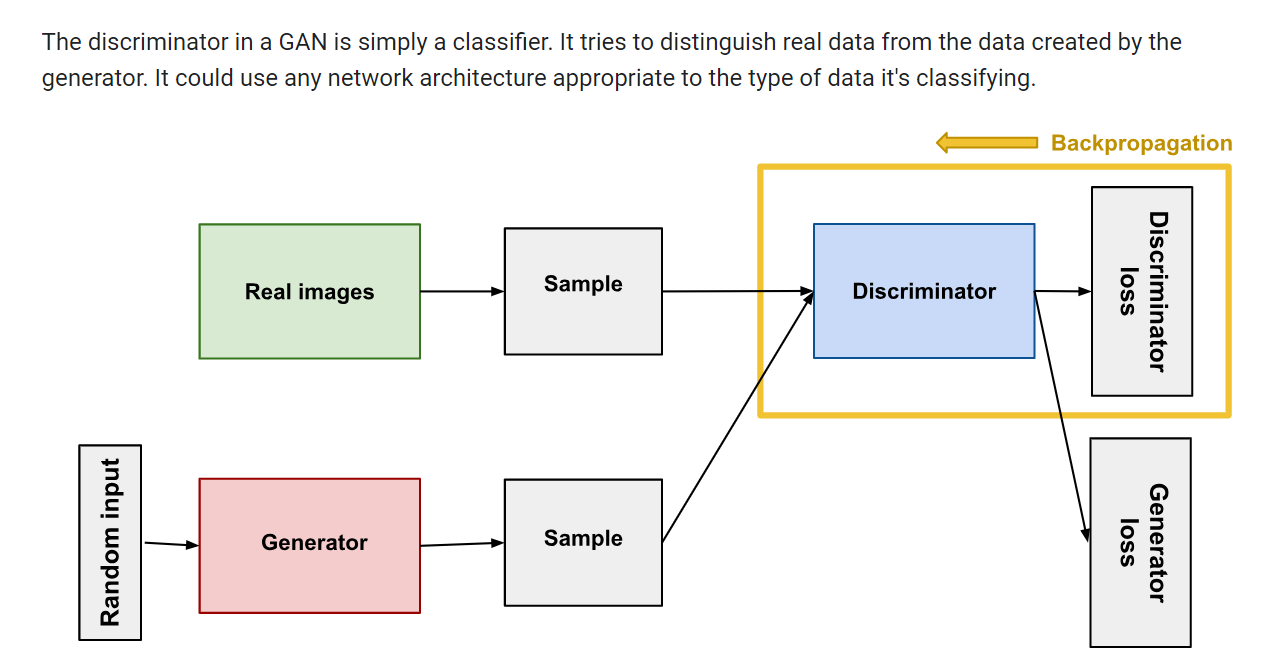

, the two "Sample" boxes represent these two data sources feeding into the discriminator. During discriminator training the generator does not train. Its weights remain constant while it produces examples for the discriminator to train on

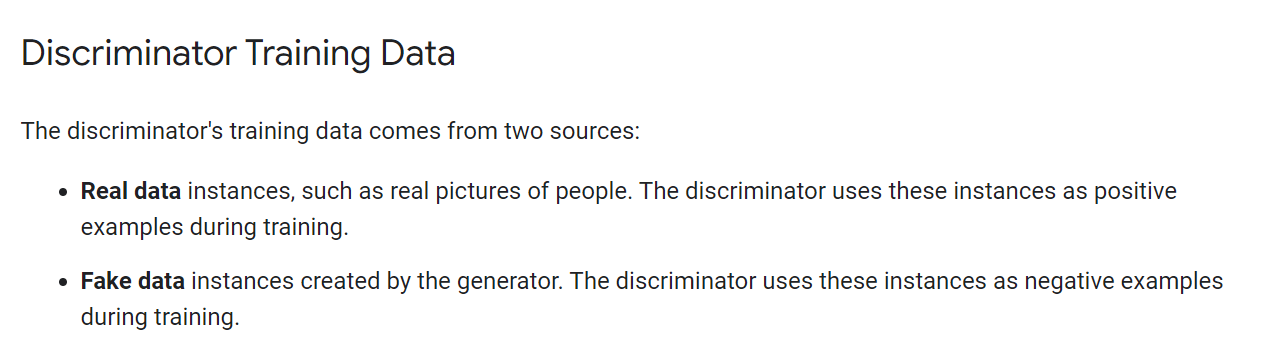

#Training the Discriminator
The discriminator connects to two loss functions. During discriminator training, the discriminator ignores the generator loss and just uses the discriminator loss. We use the generator loss during generator training

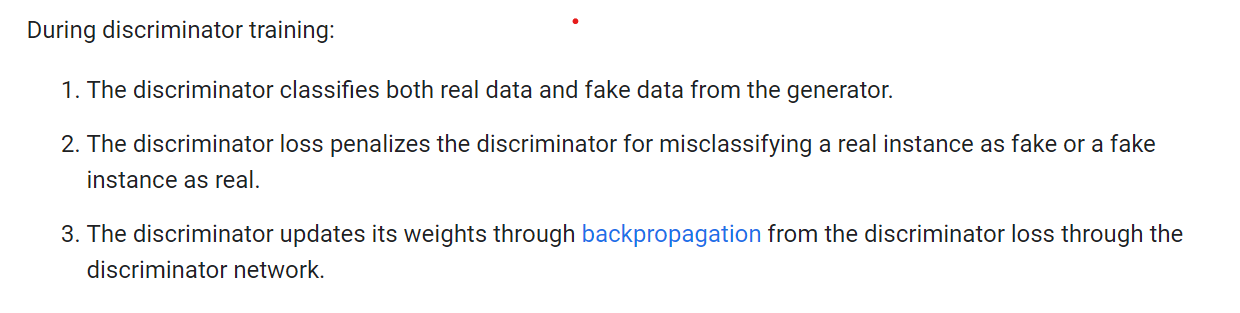

#The Generator

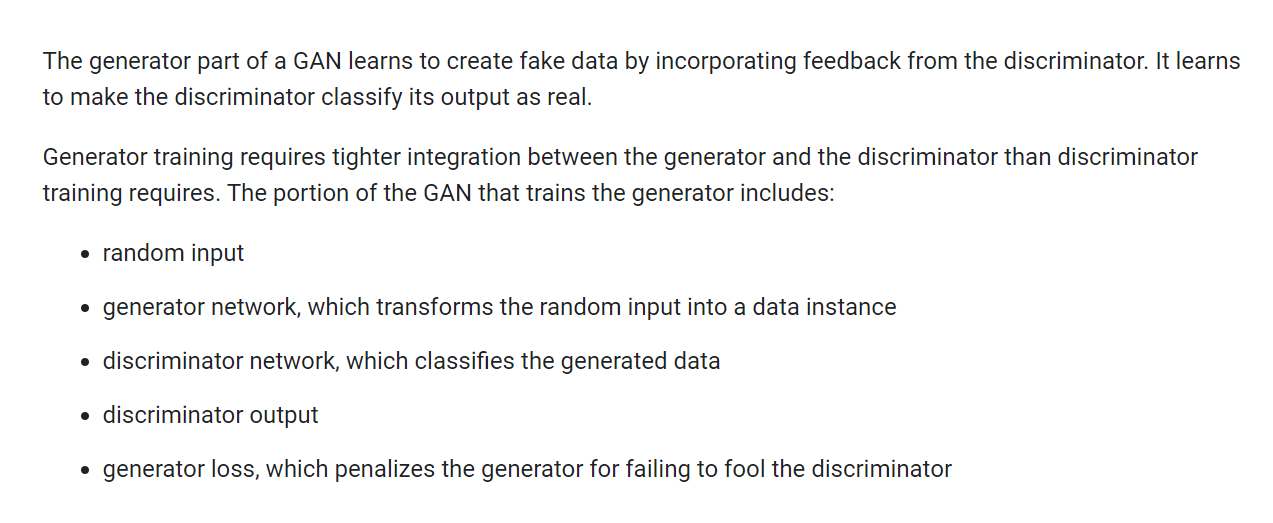

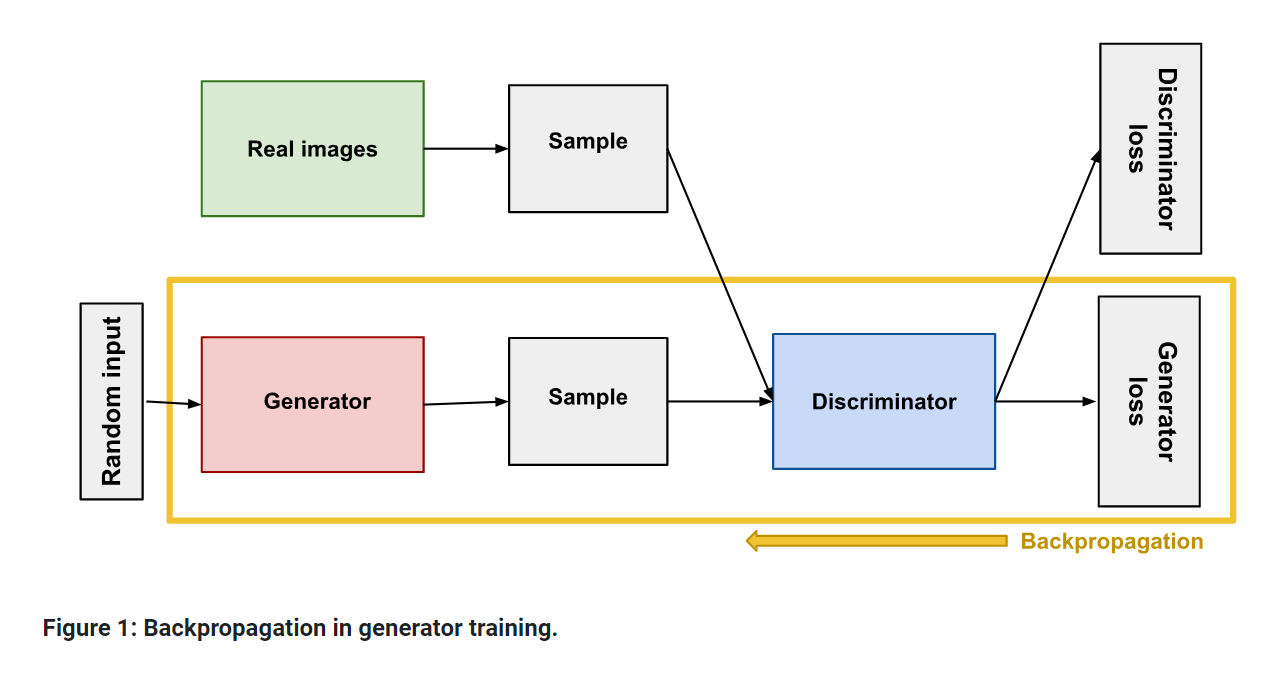

Train the generator with the following procedure:

Sample random noise.

Produce generator output from sampled random noise.

Get discriminator "Real" or "Fake" classification for generator output.

Calculate loss from discriminator classification.

Backpropagate through both the discriminator and generator to obtain gradients.

Use gradients to change only the generator weights.

#GAN Training
Because a GAN contains two separately trained networks, its training algorithm must address two complications:



Training a Generative Adversarial Network (GAN) involves addressing two key challenges due to its unique architecture consisting of two separately trained networks: the generator and the discriminator. Here's an explanation of these challenges and how they are typically handled:

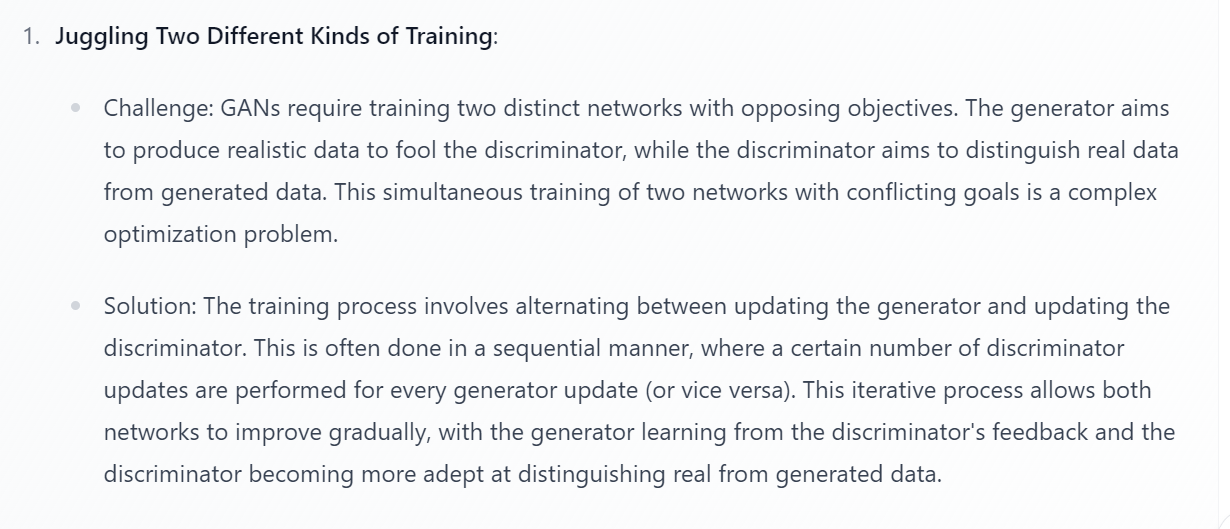

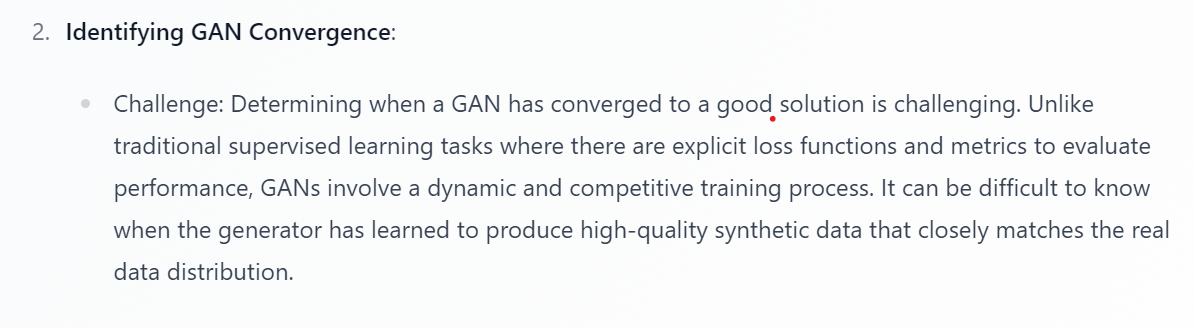

#Alternating Training

Alternating training is a crucial aspect of the GAN (Generative Adversarial Network) training process. It involves iteratively training the generator and discriminator networks in a sequential manner, addressing the unique challenges posed by GANs. Here's a step-by-step explanation:

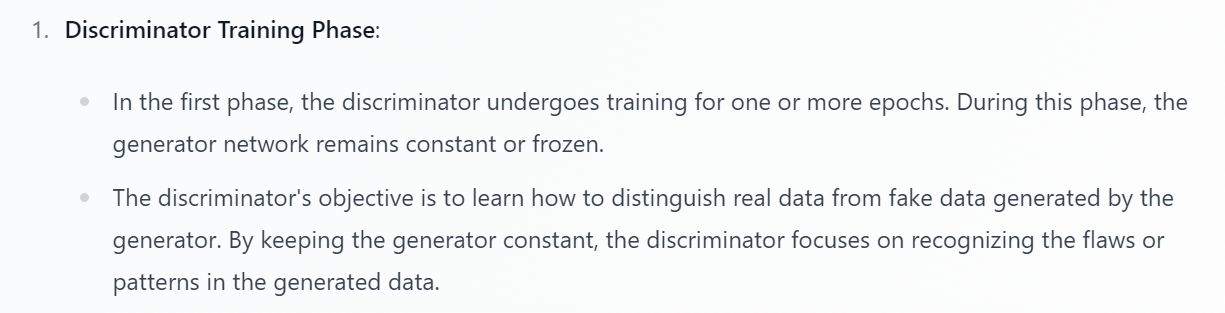

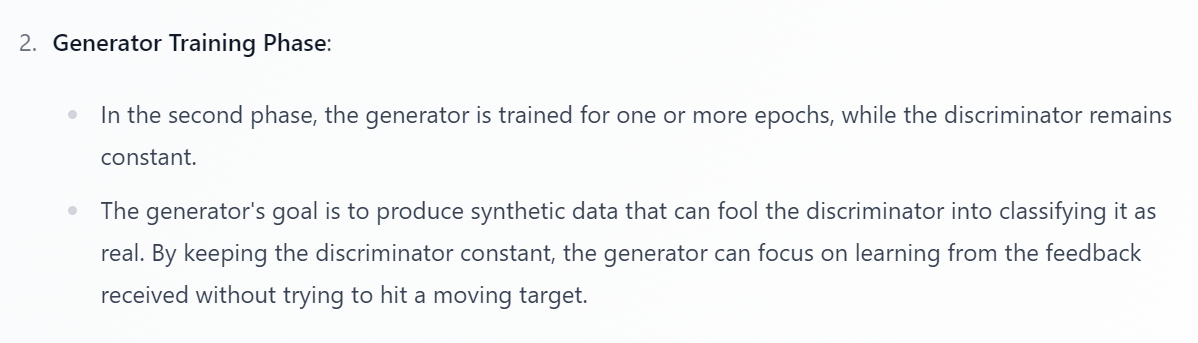

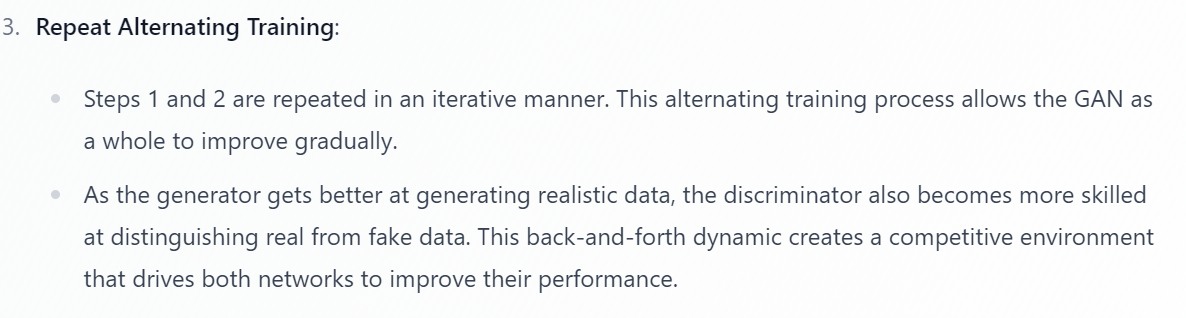

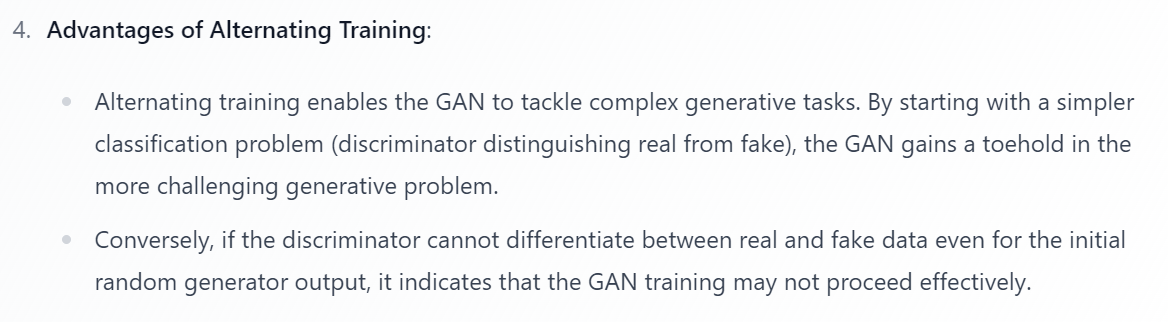

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Concatenate, Input
from tensorflow.keras.models import Model

def build_generator(text_dim, noise_dim):
    noise_input = Input(shape=(noise_dim,))
    text_input = Input(shape=(text_dim,))
    merged_input = Concatenate()([noise_input, text_input])

    x = Dense(128, activation='relu')(merged_input)
    x = Dense(256, activation='relu')(x)
    x = Dense(28*28, activation='sigmoid')(x)
    x = Reshape((28, 28, 1))(x)

    model = Model([noise_input, text_input], x)
    return model

def build_discriminator(text_dim, image_shape):
    image_input = Input(shape=image_shape)
    text_input = Input(shape=(text_dim,))
    text_embedding = Dense(image_shape[0] * image_shape[1], activation='relu')(text_input)
    text_embedding = Reshape((image_shape[0], image_shape[1], 1))(text_embedding)

    merged_input = Concatenate()([image_input, text_embedding])

    x = Flatten()(merged_input)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model([image_input, text_input], x)
    return model

# Hyperparameters
text_dim = 10  # Dimension of the text embedding
noise_dim = 100  # Dimension of the noise vector
image_shape = (28, 28, 1)

generator = build_generator(text_dim, noise_dim)
discriminator = build_discriminator(text_dim, image_shape)

# Compile the models
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

noise_input = Input(shape=(noise_dim,))
text_input = Input(shape=(text_dim,))
generated_image = generator([noise_input, text_input])
validity = discriminator([generated_image, text_input])

combined = Model([noise_input, text_input], validity)
combined.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
import numpy as np

# Simplified dummy dataset
texts = np.random.rand(100, text_dim)  # Random text vectors
images = np.random.rand(100, 28, 28, 1)  # Random images

def train_gan(generator, discriminator, combined, epochs, batch_size):
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, images.shape[0], batch_size)
        real_images = images[idx]
        real_texts = texts[idx]

        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        generated_images = generator.predict([noise, real_texts])

        d_loss_real = discriminator.train_on_batch([real_images, real_texts], real)
        d_loss_fake = discriminator.train_on_batch([generated_images, real_texts], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        g_loss = combined.train_on_batch([noise, real_texts], real)

        print(f"Epoch {epoch+1}/{epochs} | D Loss: {d_loss} | G Loss: {g_loss}")

# Train the GAN
train_gan(generator, discriminator, combined, epochs=100, batch_size=16)


1/1 [==============================] - 0s 76ms/step
Epoch 1/100 | D Loss: [1.75144824 0.09375   ] | G Loss: 0.19135451316833496
1/1 [==============================] - 0s 23ms/step
Epoch 2/100 | D Loss: [0.91722919 0.5       ] | G Loss: 0.4887045621871948
1/1 [==============================] - 0s 26ms/step
Epoch 3/100 | D Loss: [0.67994314 0.5       ] | G Loss: 0.8360686302185059
1/1 [==============================] - 0s 23ms/step
Epoch 4/100 | D Loss: [0.78591281 0.5       ] | G Loss: 0.9747273325920105
1/1 [==============================] - 0s 25ms/step
Epoch 5/100 | D Loss: [0.8798694 0.5      ] | G Loss: 0.9285486340522766
1/1 [==============================] - 0s 22ms/step
Epoch 6/100 | D Loss: [0.96943548 0.4375    ] | G Loss: 0.7755098342895508
1/1 [==============================] - 0s 21ms/step
Epoch 7/100 | D Loss: [1.0077939 0.03125  ] | G Loss: 0.6336449980735779
1/1 [==============================] - 0s 36ms/step
Epoch 8/100 | D Loss: [1.05809915 0.        ] | G Loss: 0.4783

1/1 [==============================] - 0s 47ms/step


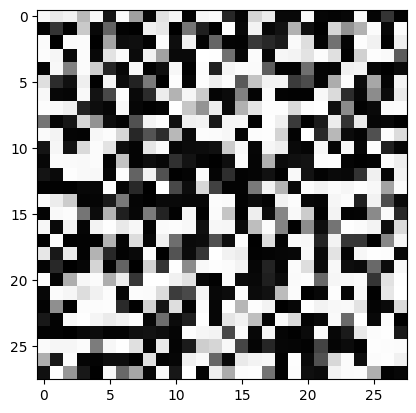

In [ ]:
import matplotlib.pyplot as generatorplt

def generate_and_show_image(generator, text_vector, noise_dim):
    noise = np.random.normal(0, 1, (1, noise_dim))
    generated_image = .predict([noise, text_vector.reshape(1, -1)])
    plt.imshow(generated_image[0, :, :, 0], cmap='gray')
    plt.show()

# Example text vector
text_vector = np.random.rand(text_dim)
generate_and_show_image(generator, text_vector, noise_dim)


#Type


A Deep Convolutional GAN (DCGAN) is a type of GAN that uses deep convolutional networks for both the generator and the discriminator. This approach tends to produce better quality images compared to simpler architectures


StyleGAN is an advanced type of GAN developed by NVIDIA, known for its ability to generate highly realistic images. It introduces a style-based generator architecture that allows for more control over the image generation process. StyleGAN is particularly known for its capability to generate high-resolution images with smooth transitions between different styles.

Conditional GANs (cGANs) are a type of GAN where both the generator and the discriminator are conditioned on some extra information. This can be class labels, text descriptions, or other data. cGANs are particularly useful for tasks where you want to generate images with specific attributes.

#Application

We will divide these applications into the following areas:

Generate Examples for Image Datasets

Generate Photographs of Human Faces

Generate Realistic Photographs

Generate Cartoon Characters

Image-to-Image Translation

Text-to-Image Translation

Semantic-Image-to-Photo Translation

Face Frontal View Generation

Generate New Human Poses

Photos to Emojis

Photograph Editing

Face Aging

Photo Blending

Super Resolution

Photo Inpainting

Clothing Translation

Video Prediction

3D Object Generation